# Reto datos abiertos Madrid

Análisis de los datos horarios de la calidad del aire del primer semestre de 2017 descargados de datos.madrid.es


In [73]:
#Importamos las librerías necesarias

import numpy as np
from os import listdir, path
import pandas as pd
import matplotlib.pyplot as plt


### Creamos dos diccionarios con los datos de las estaciones y de los parámetros.


In [74]:
estaciones = {"28079035":"Pza. del Carmen",
			  "28079004":"Pza. de España",
			  "28079039":"Barrio del Pilar",
			  "28079008":"Escuelas Aguirre",
			  "28079038":"Cuatro Caminos",
			  "28079011":"Av. Ramón y Cajal",
			  "28079040":"Vallecas",
			  "28079016":"Arturo Soria",
			  "28079017":"Villaverde Alto",
			  "28079018":"C/Farolillo",
			  "28079036":"Moratalaz",
			  "28079024":"Casa de Campo",
			  "28079027":"Barajas",
			  "28079047":"Méndez Álvaro",
			  "28079048":"Pº. Castellana",
			  "28079049":"Retiro",
			  "28079050":"Pza. Castilla",
			  "28079054":"Ensanche Vallecas",
			  "28079055":"Urb. Embajada(Barajas)",
			  "28079056":"Pza. Fdez. Ladreda",
			  "28079057":"Sanchinarro",
			  "28079058":"El Pardo",
			  "28079059":"Parque Juan Carlos I",
			  "28079060":"Tres Olivos"}

parametros = {"1":["Dióxido de Azufre", "SO2", "μg/m3"],
			  "6":["Monóxido de Carbono", "CO", "mg/m3"],
			  "7":["Monóxido de Nitrógeno", "NO", "μg/m3"],
			  "8":["Dióxido de Nitrógeno", "NO2", "μg/m3"],
			  "9":["Partículas < 2.5 μg", "PM2.5", "μg/m3"],
			  "10":["Partículas < 10 μg", "PM10", "μg/m3"],
			  "12":["Óxidos de Nitrógeno", "NOx", "μg/m3"],
			  "14":["Ozono", "O3", "μg/m3"],
			  "20":["Tolueno", "TOL","μg/m3"],
			  "30":["Benceno", "BEN", "μg/m3"],
			  "35":["Etilbenceno", "EBE", "μg/m3"],
			  "37":["Metalixeno", "MXY", "μg/m3"],
			  "38":["Paraxileno", "PXY", "μg/m3"],
			  "39":["Ortoxileno", "OXY", "μg/m3"],
			  "42":["Hidrocarburos totales (hexano)", "TCH", "mg/m3"],
			  "43":["Metano", "CH4", "mg/m3"],
			  "44":["Hidrocarburos no mecánicos (hexano)", "NMHC", "mg/m3"]}


## 1. LECTURA DE DATOS

### Creamos la función obtenerDatos que obtiene un archivo pasado por parámetro y devuelve un dataframe con los datos del archivo. 

In [75]:
#Funcion que lee los datos del archivo pasado por parámetro y los devuelve en una lista
def obtenerDatos(ruta, archivo):
  widths = [8,2,2,2,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6]
  tipos = ['String','String','String','String','Date','String','String','String','String','String','String','String',
           'String','String','String','String','String','String','String','String','String','String','String','String',
           'String','String','String','String','String']
  names = ['cod_estacion', 'cod_parametro', 'cod_tecnica', 'cod_periodo',
         'fecha'] + ['hora_' + str(i) for i in range(24)]
  return pd.read_fwf(path.join(ruta, archivo), widths=widths, header=None, types=tipos, names=names)



### Obtenemos la lista de ficheros de la carpeta dat, recorremos la lista y llamamos a la función obtenerDatos por cada fichero. Juntamos los dataframes resultado de cada fichero en uno solo y damos formato de fecha a la columna "fecha"

In [76]:
ruta = 'dat/'
lista_ficheros = listdir(ruta)

#Llamamos a la funcion obtenerDatos por cada archivo de la carpeta
df = pd.DataFrame()
df = df.append([obtenerDatos(ruta,fichero) for fichero in lista_ficheros])

# Tipo de dato correcto para la fecha
df.fecha = '20' + df.fecha.astype('str')
df.fecha = pd.to_datetime(df.fecha, format='%Y%m%d')

df.head()


,cod_estacion,cod_parametro,cod_tecnica,cod_periodo,fecha,hora_0,hora_1,hora_2,hora_3,hora_4,...,hora_14,hora_15,hora_16,hora_17,hora_18,hora_19,hora_20,hora_21,hora_22,hora_23
0,28079004,1,38,2,2017-04-01,00004V,00004V,00003V,00003V,00003V,...,00005V,00004V,00005V,00004V,00005V,00006V,00006V,00006V,00005V,00004V
1,28079004,1,38,2,2017-04-02,00004V,00004V,00004V,00004V,00003V,...,00005V,00005V,00004V,00004V,00004V,00005V,00005V,00005V,00005V,00004V
2,28079004,1,38,2,2017-04-03,00004V,00003V,00003V,00003V,00003V,...,00005V,00004V,00004V,00004V,00004V,00005V,00004V,00006V,00009V,00010V
3,28079004,1,38,2,2017-04-04,00009V,00006V,00004V,00004V,00004V,...,00004V,00004V,00004V,00004V,00004V,00004V,00005V,00005V,00005V,00004V
4,28079004,1,38,2,2017-04-05,00004V,00004V,00004V,00004V,00004V,...,00004V,00003V,00004V,00004V,00004V,00004V,00004V,00004V,00004V,00004V


### Pasamos el dataframe de formato ancho a largo para convertir en filas las columnas correspondientes a las horas

In [77]:
# De formato ancho a largo
df_melted = pd.melt(df, id_vars=['cod_estacion', 'cod_parametro', 'cod_tecnica', 'cod_periodo', 'fecha'],
                   var_name='hora')

# Arreglo los tipos de datos y separo valor de si es válido o no
df_melted.hora = df_melted.hora.apply(lambda h: h[5:]).astype('int')
df_melted['valor'] = df_melted.value.apply(lambda v: v[:-1]).astype('float')
df_melted['es_valido'] = df_melted.value.apply(lambda v: v[-1:])
del df_melted['value']

df_melted.head()


,cod_estacion,cod_parametro,cod_tecnica,cod_periodo,fecha,hora,valor,es_valido
0,28079004,1,38,2,2017-04-01,0,4.0,V
1,28079004,1,38,2,2017-04-02,0,4.0,V
2,28079004,1,38,2,2017-04-03,0,4.0,V
3,28079004,1,38,2,2017-04-04,0,9.0,V
4,28079004,1,38,2,2017-04-05,0,4.0,V


## 2. MEDIAS DE DOS ESTACIONES (CÉNTRICA Y ZONA VERDE)

### Agrupamos por estación, parámetro, hora y es_valido y calculamos la media. Esto nos dará la media por hora de cada parámetro y estación. Además al agrupar por "es_valido" después nos podemos quedar por los que tengan "V" en esta columna

In [78]:
serie_medias = df_melted.groupby(['cod_estacion', 'cod_parametro', 'hora', 'es_valido'])['valor'].mean()

df_agrupado = pd.DataFrame()
df_agrupado['media'] = serie_medias


### Del resultado de agrupar obtenemos los datos del parámetro 8 (Dióxido de Nitrógeno) para la estación de Pza. del Carmen que es céntrica y la estación de El Pardo que está instada en una zona verde y lo guardamos en dos dataframes distintos

In [79]:
# Obtenemos los datos de Dióxido de Nitrógeno (parámetro 8) de dos estaciones, una céntrica y otra en zona verde
# Estación Pza. del Carmen
df_estacion_centrica = df_agrupado.loc[28079035,8,:,'V']
# Pasamos los índices a columnas
df_estacion_centrica.reset_index(inplace=True)  

# Estación El Pardo
df_estacion_zona_verde = df_agrupado.loc[28079058,8,:,'V']
# Pasamos los índices a columnas
df_estacion_zona_verde.reset_index(inplace=True)  


### Representamos las medias por hora de las dos estaciones en gráficos de barras.

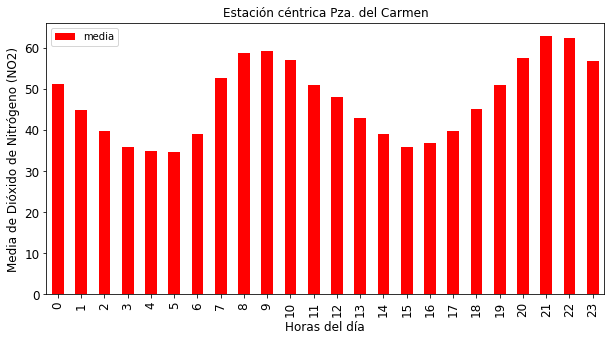

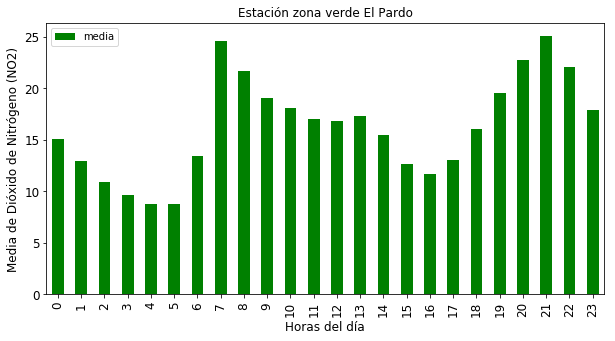

In [80]:
ylabel_text = "Media de " + str(parametros["8"][0]) + " (" + str(parametros["8"][1])+")"

titulo_a = "Estación céntrica " + str(estaciones["28079035"])
a = df_estacion_centrica['media'].plot(kind='bar', title = titulo_a, figsize=(10, 5), color = 'red', legend=True, 
                                       fontsize=12)
a.set_xlabel("Horas del día", fontsize=12)
a.set_ylabel(ylabel_text, fontsize=12)
plt.show()

titulo_b = "Estación zona verde " + str(estaciones["28079058"])
b = df_estacion_zona_verde['media'].plot(kind='bar', title = titulo_b , figsize=(10, 5), color = 'green', legend=True,
                                         fontsize=12)
b.set_xlabel("Horas del día", fontsize=12)
b.set_ylabel(ylabel_text, fontsize=12)
plt.show()

### En estos gráficos podemos ver que los niveles de Dióxido de Nitrógeno son más altos en la estación céntrica que en la que está en zona verde. La fuente fundamental del NO2 es el tráfico rodado por lo que es lógico que la estación céntrica registre valores más elevados.

### También podemos fijarnos en las horas del día en las que está más alto que son desde las 7 hasta las 10 más o menos y desde las 19:00 hasta las 23:00 que intuyo que deben ser las horas punta de tráfico en Madrid.

## 3. VALORES MÁXIMOS POR PARÁMETRO

### Creamos la función "muestra_grafico_maximos" que dado un dataframe y un código de parámetro imprime el valor máximo del parámetro y la estación en la que se registró. También muestra el gráfico con los valores máximos del parámetro por estación

In [81]:
#Funcion que lee los datos del archivo pasado por parámetro y los devuelve en una lista
def muestra_grafico_maximos(df, parametro):
    # Pasamos los índices a columnas
    df.reset_index(inplace=True)  
    df.index = df.cod_estacion
    
    serie_maximo = df.loc[df['maximo'].idxmax()]
    
    param_key = str(serie_maximo[0])
    print("El valor máximo de " + parametros[str(serie_maximo[0])][0])
    print("Fue registrado en la estación " + str(serie_maximo[1]) + " - " + estaciones[str(serie_maximo[1])])
    print("Con un valor de " + str(serie_maximo[3]) + parametros[str(serie_maximo[0])][2])
    
    ylabel_text = str(parametros[parametro][1]) + " " + str(parametros[parametro][2])
    titulo = "Valores máximos por estación de "+str(parametros[parametro][0])
    m = df['maximo'].plot(kind='bar', title = titulo, figsize=(10, 5), legend=True, 
                                       fontsize=12)
    m.set_xlabel("cod_estacion", fontsize=12)
    m.set_ylabel(ylabel_text, fontsize=12)
    plt.show()




### Agrupamos por cod_parametro, cod_estacion y es_valido y calculamos el máximo. Recorremos el diccionario de parámetros en un for y por cada uno obtenemos un dataframe filtrando por parámetro y llamamos a la función "muestra_grafico_maximos". 

El valor máximo de Dióxido de Azufre
Fue registrado en la estación 28079036 - Moratalaz
Con un valor de 98.0μg/m3


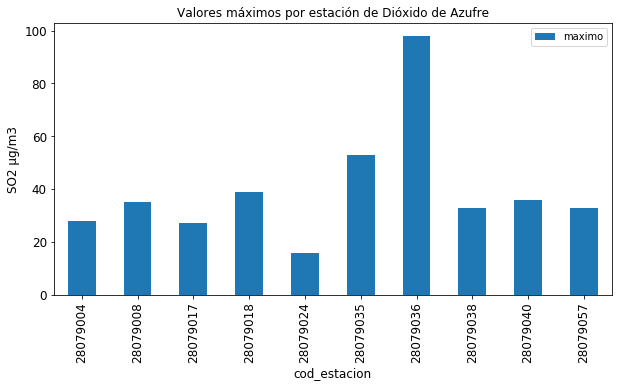

El valor máximo de Monóxido de Carbono
Fue registrado en la estación 28079008 - Escuelas Aguirre
Con un valor de 4.4mg/m3


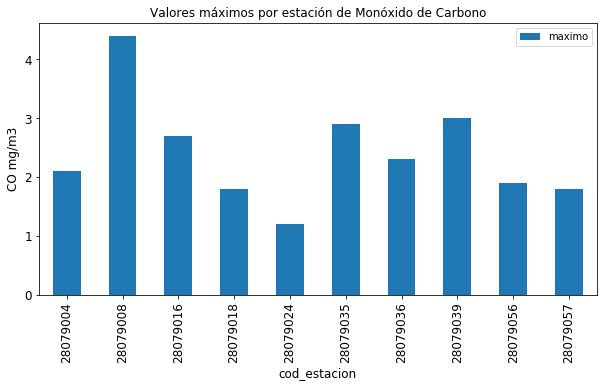

El valor máximo de Monóxido de Nitrógeno
Fue registrado en la estación 28079008 - Escuelas Aguirre
Con un valor de 676.0μg/m3


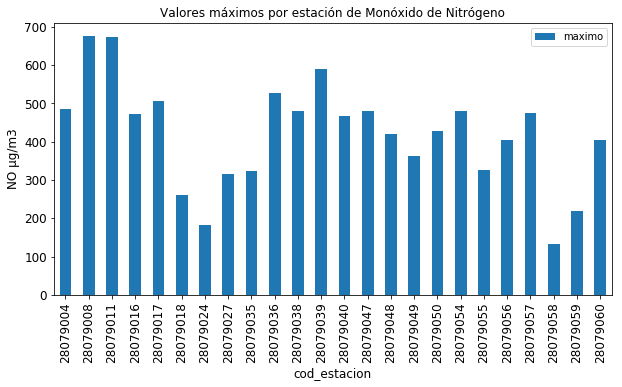

El valor máximo de Dióxido de Nitrógeno
Fue registrado en la estación 28079056 - Pza. Fdez. Ladreda
Con un valor de 262.0μg/m3


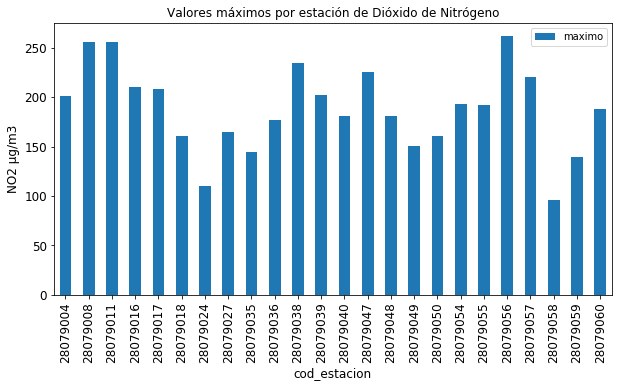

El valor máximo de Partículas < 2.5 μg
Fue registrado en la estación 28079048 - Pº. Castellana
Con un valor de 96.0μg/m3


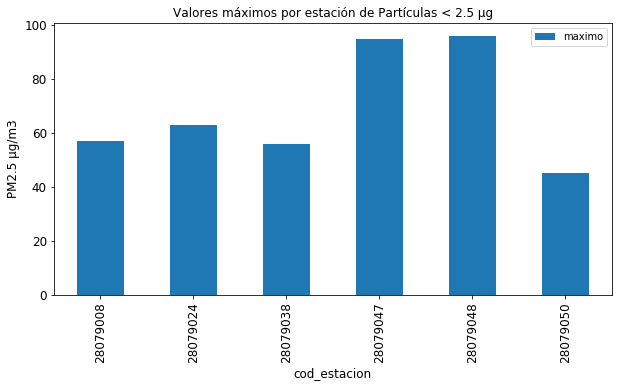

El valor máximo de Partículas < 10 μg
Fue registrado en la estación 28079018 - C/Farolillo
Con un valor de 308.0μg/m3


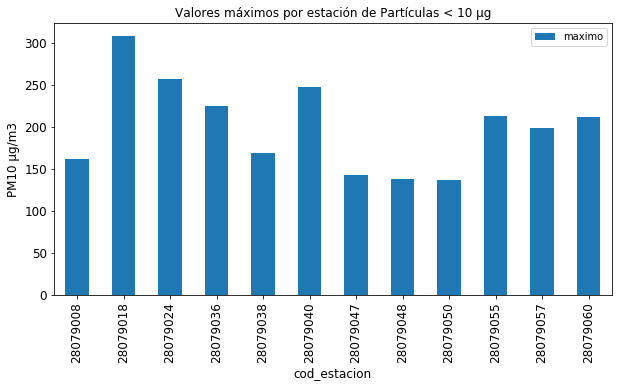

El valor máximo de Ozono
Fue registrado en la estación 28079024 - Casa de Campo
Con un valor de 193.0μg/m3


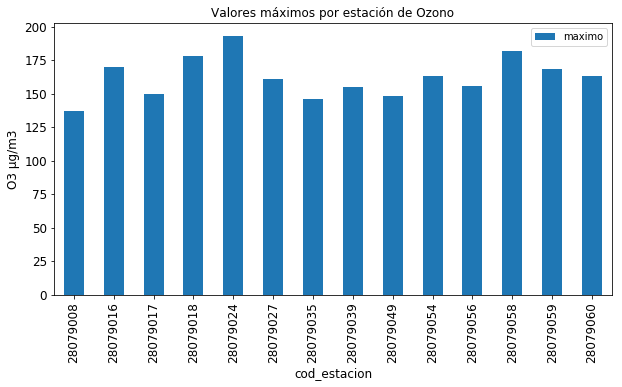

El valor máximo de Tolueno
Fue registrado en la estación 28079011 - Av. Ramón y Cajal
Con un valor de 52.2μg/m3


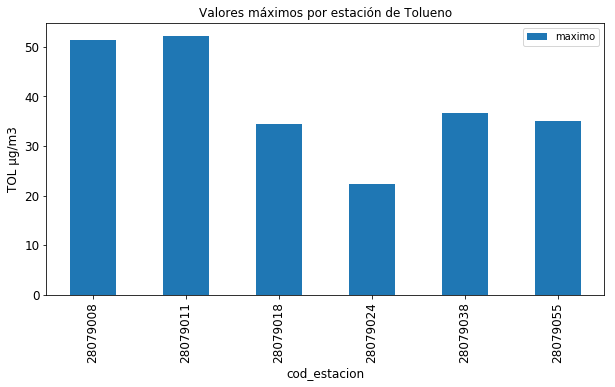

El valor máximo de Benceno
Fue registrado en la estación 28079011 - Av. Ramón y Cajal
Con un valor de 12.0μg/m3


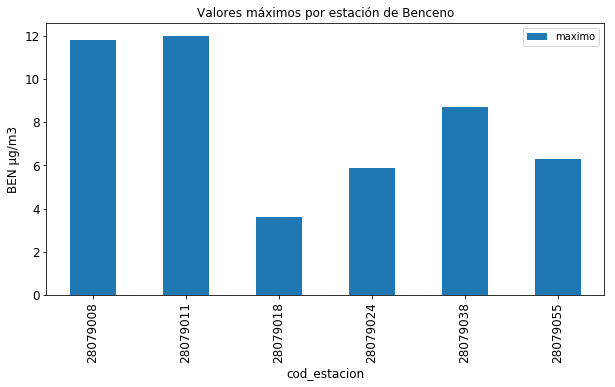

El valor máximo de Etilbenceno
Fue registrado en la estación 28079008 - Escuelas Aguirre
Con un valor de 38.3μg/m3


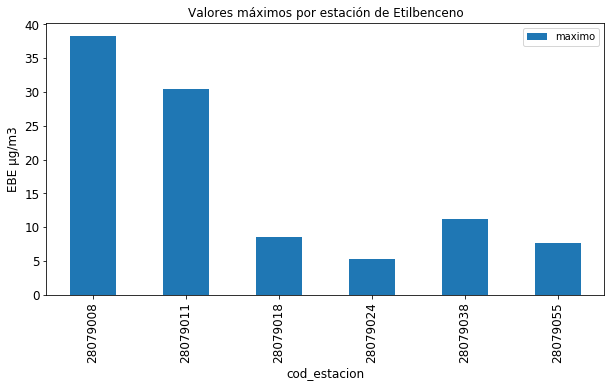

El valor máximo de Hidrocarburos totales (hexano)
Fue registrado en la estación 28079008 - Escuelas Aguirre
Con un valor de 6.67mg/m3


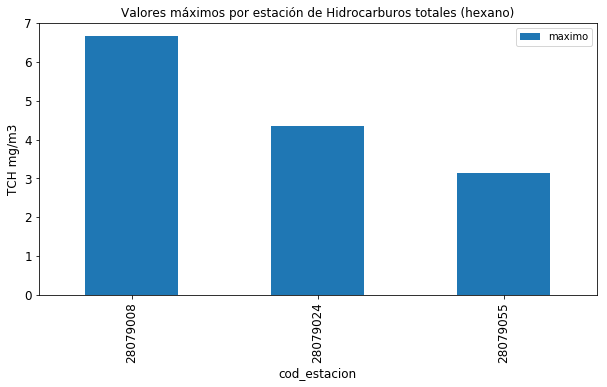

El valor máximo de Hidrocarburos no mecánicos (hexano)
Fue registrado en la estación 28079008 - Escuelas Aguirre
Con un valor de 4.4mg/m3


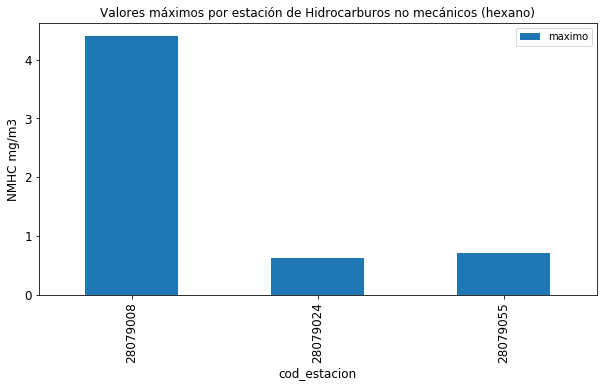

In [82]:
serie_maximos = df_melted.groupby(['cod_parametro', 'cod_estacion', 'es_valido'])['valor'].max()

df_agrupado_max = pd.DataFrame()
df_agrupado_max['maximo'] = serie_maximos

parametros_list = parametros.keys()

for parametro in parametros_list:
    if int(parametro) in df_agrupado_max.index.levels[0]:
        muestra_grafico_maximos(df_agrupado_max.loc[int(parametro),:,'V'], parametro)
        
        